In [1]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 320.4MB 52kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
a = tf.Variable([1, 2])
b = tf.Variable([5, 6])

In [7]:
a + b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([6, 8], dtype=int32)>

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

MNIST

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, 'Label=2')

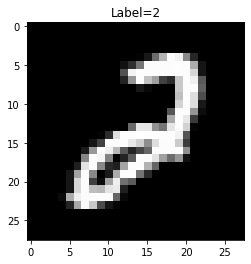

In [30]:
ind = 555
plt.imshow(x_train[ind], cmap='gray')
plt.title('Label={}'.format(y_train[ind]))

2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  
5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]  
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [32]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [45]:
x_train = x_train / 255.
x_test = x_test / 255.

In [46]:
# Functional API:

# Input layer (input shape (784,) )
inp = tf.keras.layers.Input(shape=((784,)))

# Output FC layer (10 outputs & softmax activation)
out = tf.keras.layers.Dense(10, activation='softmax')(inp)

# Define a model inputs=inp,  outputs=out
logistic = tf.keras.models.Model(inp, out)

In [47]:
logistic.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [48]:
logistic.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
x_train_flat = x_train.reshape(-1, 784)

hist1 = logistic.fit(x_train_flat, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7797 - accuracy: 0.8139
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4561 - accuracy: 0.8804
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4033 - accuracy: 0.8916
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8973
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3599 - accuracy: 0.9013
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3479 - accuracy: 0.9041
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3390 - accuracy: 0.9059
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3318 - accuracy: 0.9078
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3260 - accuracy: 0.9094
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.321

In [50]:
logistic.evaluate(x_test.reshape(-1, 784), y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.2863 - accuracy: 0.9206


0.9205999970436096

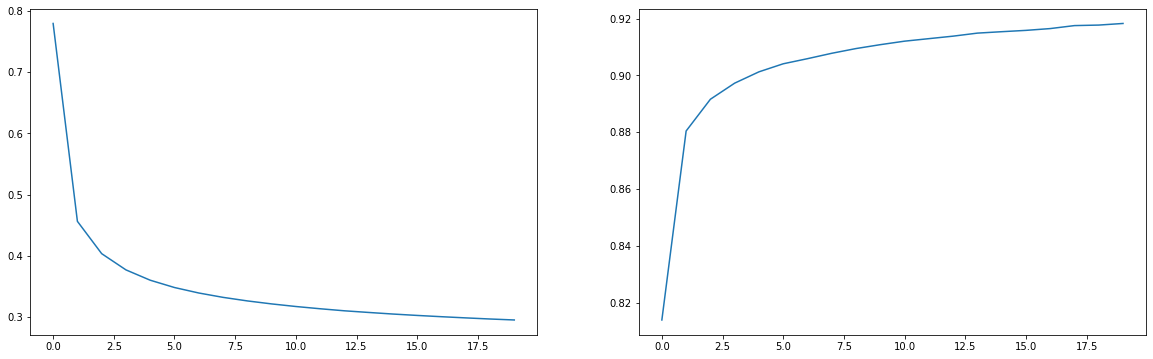

In [51]:
plt.figure(figsize=(20, 6))

ax = plt.subplot(121)
ax.plot(hist1.history['loss'])

ax = plt.subplot(122)
ax.plot(hist1.history['accuracy'])

In [53]:
weights = logistic.get_weights()[0]

In [54]:
weights.shape

(784, 10)

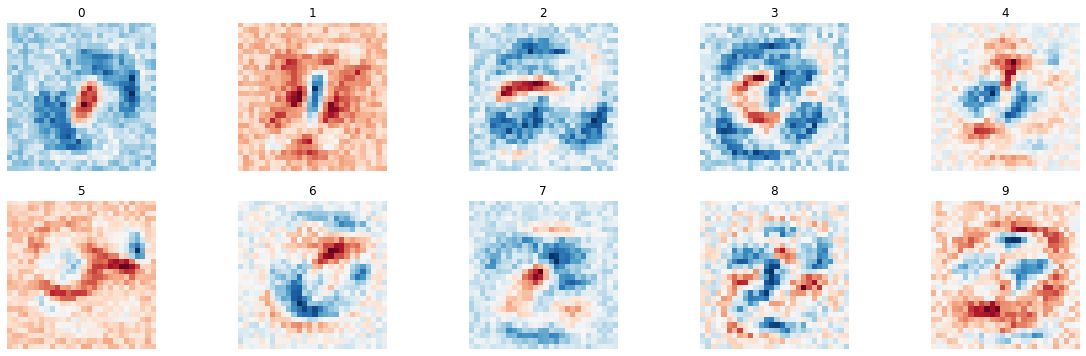

In [55]:
plt.figure(figsize=(20, 6))

for i in range(10):

  ax = plt.subplot(2, 5, i+1)
  w = weights[:, i].reshape((28, 28))
  ax.imshow(w, cmap='RdBu')
  ax.axis('off')
  ax.set_title(str(i))

In [56]:
inp = tf.keras.layers.Input(shape=((784,)))
hid = tf.keras.layers.Dense(100, activation='relu')(inp)
out = tf.keras.layers.Dense(10, activation='softmax')(hid)

fc = tf.keras.models.Model(inp, out)

In [57]:
fc.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [60]:
fc.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist2 = fc.fit(x_train_flat, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1947 - accuracy: 0.9459
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1829 - accuracy: 0.9488
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1724 - accuracy: 0.9518
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1633 - accuracy: 0.9542
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1548 - accuracy: 0.9570
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1472 - accuracy: 0.9590
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1405 - accuracy: 0.9609
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1343 - accuracy: 0.9628
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1283 - accuracy: 0.9641
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.123

In [61]:
fc.evaluate(x_test.reshape(-1, 784), y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9693


0.9692999720573425

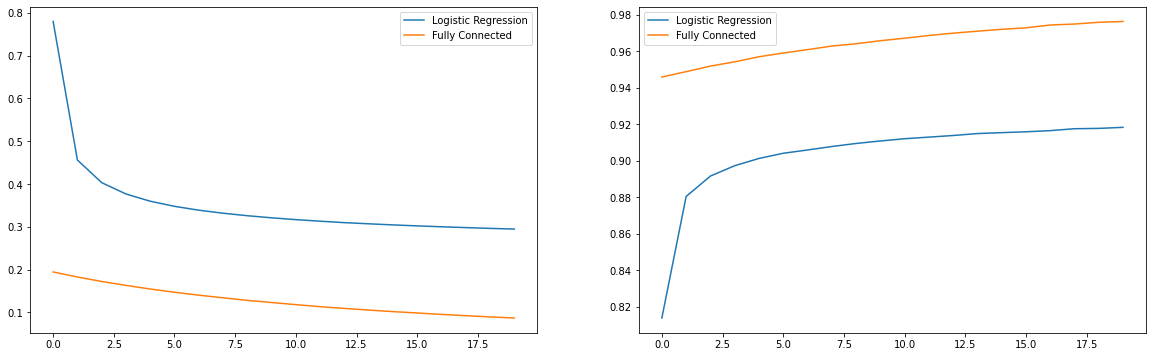

In [62]:
plt.figure(figsize=(20, 6))

ax = plt.subplot(121)
ax.plot(hist1.history['loss'], label='Logistic Regression')
ax.plot(hist2.history['loss'], label='Fully Connected')
ax.legend()

ax = plt.subplot(122)
ax.plot(hist1.history['accuracy'], label='Logistic Regression')
ax.plot(hist2.history['accuracy'], label='Fully Connected')
ax.legend()

In [63]:
inp = tf.keras.layers.Input(shape=(28, 28, 1))  # (batch, height, width, channels)


c1 = tf.keras.layers.Conv2D(8, kernel_size=(6, 6), padding='same', activation='relu')(inp)

c2 = tf.keras.layers.Conv2D(16, kernel_size=(6, 6), padding='same', activation='relu')(c1)

p1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(c2)

c3 = tf.keras.layers.Conv2D(32, kernel_size=(4, 4), padding='same', activation='relu')(p1)

c4 = tf.keras.layers.Conv2D(64, kernel_size=(4, 4), padding='same', activation='relu')(c3)

p2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(c4)

fl = tf.keras.layers.Flatten()(p2)

out = tf.keras.layers.Dense(10, activation='softmax')(fl)


cnn = tf.keras.models.Model(inp, out)

cnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
cnn.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         296       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)        

In [66]:
hist3 = cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5021 - accuracy: 0.8324
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9731
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0604 - accuracy: 0.9815
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9850
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9892
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0315 - accuracy: 0.9901
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9921
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.022

In [70]:
cnn.evaluate(x_test, y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9895


0.9894999861717224

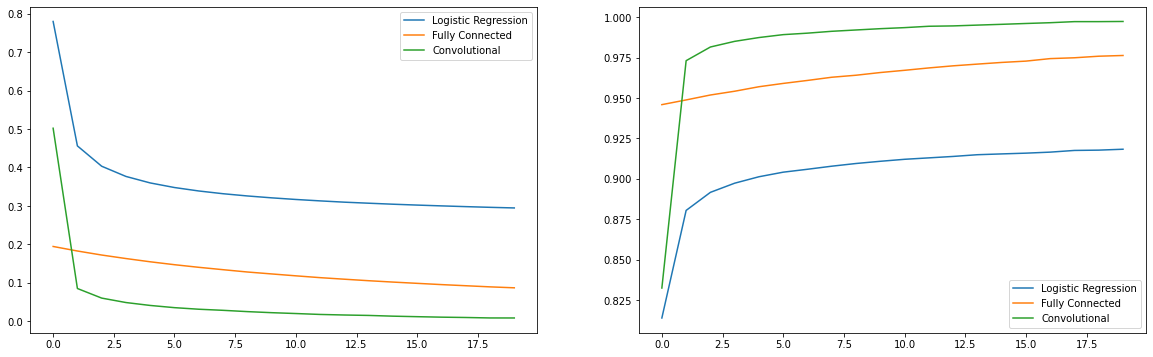

In [68]:
plt.figure(figsize=(20, 6))

ax = plt.subplot(121)
ax.plot(hist1.history['loss'], label='Logistic Regression')
ax.plot(hist2.history['loss'], label='Fully Connected')
ax.plot(hist3.history['loss'], label='Convolutional')
ax.legend()

ax = plt.subplot(122)
ax.plot(hist1.history['accuracy'], label='Logistic Regression')
ax.plot(hist2.history['accuracy'], label='Fully Connected')
ax.plot(hist3.history['accuracy'], label='Convolutional')
ax.legend()

In [73]:
chp = tf.keras.callbacks.ModelCheckpoint('best_weigths.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, cooldown=1)

cnn = tf.keras.models.Model(inp, out)
cnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

hist4 = cnn.fit(x_train, y_train, epochs=20, batch_size=256, callbacks=[chp, reduce_lr],
                validation_data=(x_test, y_test))

Epoch 1/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0313 - val_accuracy: 0.9907
Epoch 2/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0325 - val_accuracy: 0.9905
Epoch 3/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0316 - val_accuracy: 0.9905
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0317 - val_accuracy: 0.9905
Epoch 5/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0320 - val_accuracy: 0.9904
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0319 - val_accuracy: 0.9905
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0322 - val_accuracy: 0.9907